In [18]:
# IMPORTS

import tensorflow as tf
import os
import pathlib
import time
import datetime
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from google.cloud import storage

In [10]:
sketch_path = "/Users/alicepannequin/code/dcorballorenzo/FF2S/sketch_preproc/sketch1_preproc/"

#Get the list of files in the path and sort it 
sketch_list = os.listdir(sketch_path)
sketch_list.sort()
sketch_list

['sketch0001.jpg',
 'sketch0002.jpg',
 'sketch0003.jpg',
 'sketch0004.jpg',
 'sketch0005.jpg',
 'sketch0006.jpg',
 'sketch0007.jpg',
 'sketch0008.jpg',
 'sketch0009.jpg',
 'sketch0010.jpg',
 'sketch0011.jpg',
 'sketch0012.jpg',
 'sketch0013.jpg',
 'sketch0014.jpg',
 'sketch0015.jpg',
 'sketch0016.jpg',
 'sketch0017.jpg',
 'sketch0018.jpg',
 'sketch0019.jpg',
 'sketch0020.jpg',
 'sketch0021.jpg',
 'sketch0022.jpg',
 'sketch0023.jpg',
 'sketch0024.jpg',
 'sketch0025.jpg',
 'sketch0026.jpg',
 'sketch0027.jpg',
 'sketch0028.jpg',
 'sketch0029.jpg',
 'sketch0030.jpg',
 'sketch0031.jpg',
 'sketch0032.jpg',
 'sketch0033.jpg',
 'sketch0034.jpg',
 'sketch0035.jpg',
 'sketch0036.jpg',
 'sketch0037.jpg',
 'sketch0038.jpg',
 'sketch0039.jpg',
 'sketch0040.jpg',
 'sketch0041.jpg',
 'sketch0042.jpg',
 'sketch0043.jpg',
 'sketch0044.jpg',
 'sketch0045.jpg',
 'sketch0046.jpg',
 'sketch0047.jpg',
 'sketch0048.jpg',
 'sketch0049.jpg',
 'sketch0050.jpg',
 'sketch0051.jpg',
 'sketch0052.jpg',
 'sketch0053

In [11]:
sketch_array= np.asarray([np.asarray(plt.imread(sketch_path+image)) for image in photo_list])
sketch_array

array([[[[240, 240, 240],
         [242, 242, 242],
         [244, 244, 244],
         ...,
         [240, 240, 240],
         [244, 244, 244],
         [245, 245, 245]],

        [[247, 247, 247],
         [248, 248, 248],
         [249, 249, 249],
         ...,
         [222, 222, 222],
         [229, 229, 229],
         [238, 238, 238]],

        [[248, 248, 248],
         [249, 249, 249],
         [248, 248, 248],
         ...,
         [229, 229, 229],
         [230, 230, 230],
         [236, 236, 236]],

        ...,

        [[251, 251, 251],
         [252, 252, 252],
         [250, 250, 250],
         ...,
         [248, 248, 248],
         [249, 249, 249],
         [250, 250, 250]],

        [[249, 249, 249],
         [250, 250, 250],
         [249, 249, 249],
         ...,
         [247, 247, 247],
         [248, 248, 248],
         [249, 249, 249]],

        [[254, 254, 254],
         [251, 251, 251],
         [249, 249, 249],
         ...,
         [247, 247, 247],
        

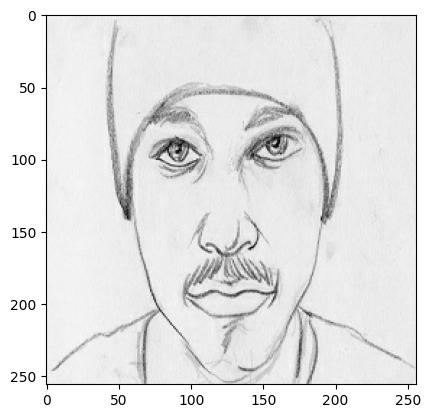

In [81]:
#ARTHUR

path = tf.data.Dataset.list_files('gs://ff2s/preproc_sketch/sketch*/*.jpg')

def load_image(path):
    img = tf.io.read_file(path)
    img = tf.io.decode_jpeg(img)
    return img

ds_img = ds_path.map(load_image)

plt.imshow(next(iter(ds_img.take(1))).numpy())

In [ ]:
#TRAIN DATASET

train_dataset = tf.data.Dataset.list_files(str(PATH / 'train/*.jpg'))
train_dataset = train_dataset.map(load_image_train,
                                  num_parallel_calls=tf.data.AUTOTUNE)
train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.batch(BATCH_SIZE)

GENERATOR

In [30]:
OUTPUT_CHANNELS = 3

In [31]:
#ENCODEUR

def downsample(filters, size, apply_batchnorm=True):
    
    init = tf.random_normal_initializer(0., 0.02)
    result = tf.keras.Sequential()
    result.add(
      tf.keras.layers.Conv2D(filters, size, strides=2, padding='same',
                             kernel_initializer=init, use_bias=False))

    if apply_batchnorm:
        result.add(tf.keras.layers.BatchNormalization())

    result.add(tf.keras.layers.LeakyReLU(alpha=0.2))

    return result

In [32]:
#DECODEUR

def upsample(filters, size, apply_dropout=False):
    initializer = tf.random_normal_initializer(0., 0.02)

    result = tf.keras.Sequential()
    result.add(
    tf.keras.layers.Conv2DTranspose(filters, size, strides=2,
                                    padding='same',
                                    kernel_initializer=initializer,
                                    use_bias=False))

    result.add(tf.keras.layers.BatchNormalization())

    if apply_dropout:
        result.add(tf.keras.layers.Dropout(0.5))

    result.add(tf.keras.layers.ReLU())

    return result

In [33]:
down_model = downsample(3, 4)
down_result = down_model(tf.expand_dims(inp, 0))
print (down_result.shape) ##revenir apres avoir fait le discriminator

NameError: name 'inp' is not defined

In [34]:
#GENERATEUR FINAL

def Generator(image_shape=(256,256,3)):
    
    inputs = tf.keras.layers.Input(shape=image_shape)
    init = tf.random_normal_initializer(0., 0.02)

    down_stack = [
    downsample(64, 4, apply_batchnorm=False),  # (batch_size, 128, 128, 64)
    downsample(128, 4),  # (batch_size, 64, 64, 128)
    downsample(256, 4),  # (batch_size, 32, 32, 256)
    downsample(512, 4),  # (batch_size, 16, 16, 512)
    downsample(512, 4),  # (batch_size, 8, 8, 512)
    downsample(512, 4),  # (batch_size, 4, 4, 512)
    downsample(512, 4),  # (batch_size, 2, 2, 512)
    downsample(512, 4),  # (batch_size, 1, 1, 512)
  ]

    up_stack = [
    upsample(512, 4, apply_dropout=True),  # (batch_size, 2, 2, 1024)
    upsample(512, 4, apply_dropout=True),  # (batch_size, 4, 4, 1024)
    upsample(512, 4, apply_dropout=True),  # (batch_size, 8, 8, 1024)
    upsample(512, 4),  # (batch_size, 16, 16, 1024)
    upsample(256, 4),  # (batch_size, 32, 32, 512)
    upsample(128, 4),  # (batch_size, 64, 64, 256)
    upsample(64, 4),  # (batch_size, 128, 128, 128)
  ]

    
    last = tf.keras.layers.Conv2DTranspose(OUTPUT_CHANNELS, 4,
                                         strides=2,
                                         padding='same',
                                         kernel_initializer=init,
                                         activation='tanh')  # (batch_size, 256, 256, 3)

    x = inputs

  # Downsampling through the model
    skips = []
    for down in down_stack:
        x = down(x)
        skips.append(x)

    skips = reversed(skips[:-1])

  # Upsampling and establishing the skip connections
    for up, skip in zip(up_stack, skips):
        x = up(x)
        x = tf.keras.layers.Concatenate()([x, skip])

        x = last(x)

    return tf.keras.Model(inputs=inputs, outputs=x)

DISCRIMINATEUR

In [47]:
def Discriminator():
  initializer = tf.random_normal_initializer(0., 0.02)

  inp = tf.keras.layers.Input(shape=[256, 256, 3], name='input_image')
  tar = tf.keras.layers.Input(shape=[256, 256, 3], name='target_image')
  
  x = tf.keras.layers.concatenate([inp, tar])  # (batch_size, 256, 256, channels*2)

  down1 = downsample(64, 4, False)(x)  # (batch_size, 128, 128, 64)
  down2 = downsample(128, 4)(down1)  # (batch_size, 64, 64, 128)
  down3 = downsample(256, 4)(down2)  # (batch_size, 32, 32, 256)
  down4 = downsample(512, 4)(down3)  # (batch_size, 16, 16, 512)
  
  zero_pad1 = tf.keras.layers.ZeroPadding2D()(down4)  # (batch_size, 34, 34, 256)
  conv = tf.keras.layers.Conv2D(512, 4, strides=1,
                                kernel_initializer=initializer,
                                use_bias=False)(zero_pad1)  # (batch_size, 31, 31, 512)

  batchnorm1 = tf.keras.layers.BatchNormalization()(conv)

  leaky_relu = tf.keras.layers.LeakyReLU()(batchnorm1)

  zero_pad2 = tf.keras.layers.ZeroPadding2D()(leaky_relu)  # (batch_size, 33, 33, 512)

  last = tf.keras.layers.Conv2D(1, 4, strides=1,
                                kernel_initializer=initializer)(zero_pad2)  # (batch_size, 30, 30, 1)

  model = tf.keras.Model(inputs=[inp, tar], outputs=last) #define model 
  
  opt = tf.keras.optimizers.Adam(learning_rate=0.0002, beta_1 = 0.5)
  model.compile(loss='binary_crossentropy', optimizer= opt, loss_weights = [0.5])
  
  return model

In [48]:
discriminator = Discriminator()
tf.keras.utils.plot_model(discriminator, show_shapes=True, dpi=64)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
